In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = "/content/drive/MyDrive/Cat&Dog Dataset/Training_data"
valid_path = "/content/drive/MyDrive/Cat&Dog Dataset/Testing_data"

In [ ]:
model = tf.keras.models.Sequential([
    #input shape is desired size of the image 300*300 with 3 bytes colours
    #first convolution
    tf.keras.layers.Conv2D(filters=16,kernel_size=3, activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #2nd convolution
    tf.keras.layers.Conv2D(filters=16,kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = 2),
    #3rd convolution
    tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = 2),
    #4th convolution
    tf.keras.layers.Conv2D(filters=64,kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = 2),
    #5th convolution
    tf.keras.layers.Conv2D(filters=64,kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = 2),
    #flatten the results to feed t DNN
    tf.keras.layers.Flatten(),
    #512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    #only 1 output neuron. It will contain a value from 0 -1, 0 for class1 cat
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 298, 298, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,669,489 (6.37 MB)

 Trainable params: 1,669,489 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy']
             )

In [ ]:
#all train iages will be rescaled by 1./255
train_datagen =  ImageDataGenerator(rescale = 1./255.0)

#flow training images in batches of 128 using train_datagen genarator
train_genarator = train_datagen.flow_from_directory(train_path,#source directory for trainin gimages
                                                   target_size = (300, 300),#all images will be resize to 300*300
                                                   batch_size = 32,
                                                    #since we use binary_crossentropy loss, we need binary labels
                                                   class_mode = 'binary')

#all test images will be rescaled by 1./255
test_datagen = ImageDataGenerator(rescale = 1./255)
#apply predifined spcification to test dataset
test_set =  test_datagen.flow_from_directory(valid_path,
                                            target_size = (300,300),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 633 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
history = model.fit(train_genarator,validation_data=test_set,steps_per_epoch=8,epochs=20)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 125s 13s/step - accuracy: 0.6493 - loss: 0.6775 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.5771 - loss: 0.6642 - val_accuracy: 0.5000 - val_loss: 0.7113
Epoch 3/20
4/8 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5273 - loss: 0.6937

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5529 - loss: 0.6807 - val_accuracy: 0.5000 - val_loss: 0.6859
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.5706 - loss: 0.6658 - val_accuracy: 0.5000 - val_loss: 0.6993
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.6282 - loss: 0.6337 - val_accuracy: 0.5000 - val_loss: 0.7236
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6305 - loss: 0.6181 - val_accuracy: 0.5250 - val_loss: 0.6780
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.6031 - loss: 0.6254 - val_accuracy: 0.5050 - val_loss: 0.6930
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.7116 - loss: 0.5839 - val_accuracy: 0.5550 - val_loss: 0.6832
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6826 - loss: 0.5917 - val_accuracy: 0.5750 - val_loss: 0.6734
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.6630 - loss: 0.6014 - val_accuracy: 0.5350 - val_loss: 0.7299
Epoch 11/20
8/8 ━━

In [ ]:
save_path = "/content/drive/MyDrive"
model.save_weights(os.path.join(save_path, "MLOMlab5_fist_try.weights.h5"))

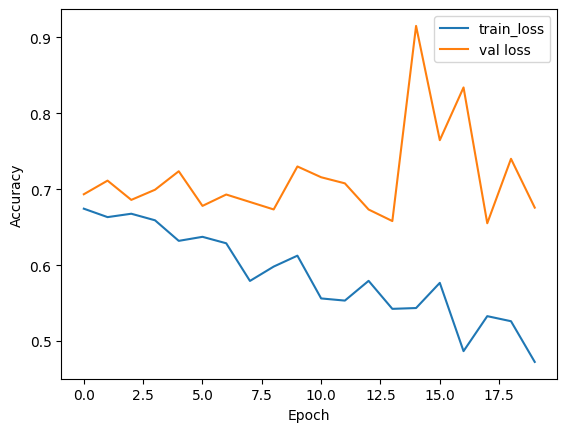

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot variation in loss and accuracy
import matplotlib.pyplot as plt
#plot the class
plt.plot(history.history['loss'],  label='train_loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

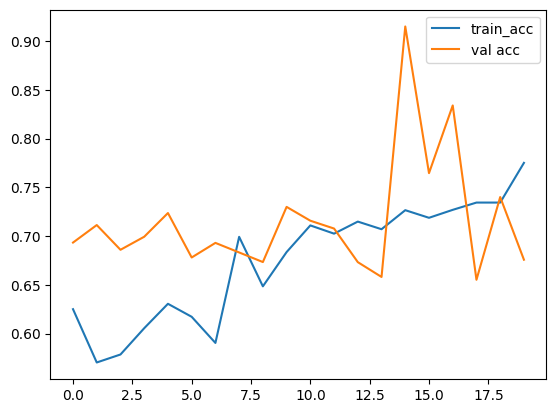

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot the accuracy
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_loss'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')